In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import torch

import seaborn as sns

from privacy_utils import get_sigma_epsilon


sns.set_style("whitegrid")

plt.rcParams['text.usetex'] = True #Let TeX do the typsetting
plt.rcParams['text.latex.preamble'] = r"""
\usepackage{sansmath}
\sansmath
""" #Force sans-serif math mode (for axes labels)
plt.rcParams['font.family'] = 'sans-serif' # ... for regular text
plt.rcParams['font.sans-serif'] = 'Helvetica, Avant Garde, Computer Modern Sans serif' # Choose a nice font here

fontsize = 15
base_path = "./data"

In [2]:
ds_name = "celebA"
# ds_name = "utkface"


res = joblib.load(f"data/dpdg_wgacc_{ds_name}.pkl")
epsilon, trn_wg_acc, tst_wg_acc = res['epsilon'], res['trn_wg_acc'], res['tst_wg_acc']
#print(epsilon)
## ticks_ = [-1, 2, 5, 10, 15, 20]
#
#ticks_ = [1, 5, 9, 13, 20]
## ticks_ = [1, 5, 9, 13, 18]
#line, = plt.plot(epsilon[1:], trn_wg_acc[1:], label="trn")
#plt.plot(epsilon[0: 2], trn_wg_acc[0: 2], color=line.get_color(), ls='--')
#line, = plt.plot(epsilon[1:], tst_wg_acc[1:], label="tst")
#plt.plot(epsilon[0: 2], tst_wg_acc[0: 2], color=line.get_color(), ls='--')
#plt.xscale("log")
#plt.xticks(fontsize=fontsize, ticks=[float(10**i) for i in ticks_], labels=[f"$10^{{{eps}}}$" for eps in ticks_[:-1]] + ['$\infty$'])
#plt.yticks(fontsize=fontsize)
#plt.xlabel("Privacy budget $\epsilon$", fontsize=fontsize)
#plt.ylabel("Worst-group accuracy", fontsize=fontsize)
#plt.legend(fontsize=fontsize, frameon=False)
#plt.tight_layout()
#plt.savefig(f"figs/dpdg_wgacc_{ds_name}.png")

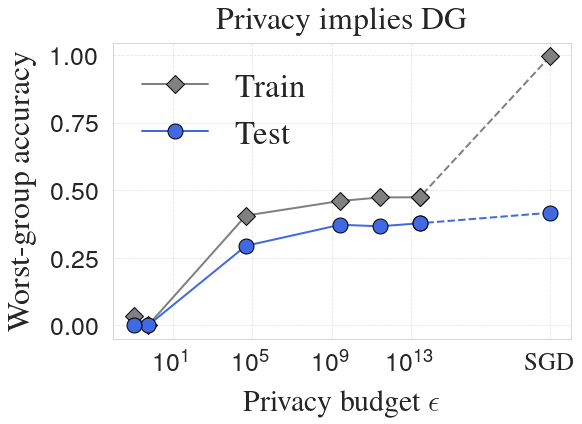

In [3]:
# epsilon = np.concatenate([[1e20], results['epsilon']])
# trn_wg_acc = np.concatenate(([erm_trn_acc_wg], results['trn wg acc']))
# tst_wg_acc = np.concatenate(([erm_tst_acc_wg], results['tst wg acc']))


# ticks_ = [-1, 2, 5, 10, 15, 20]
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams.update({
  "text.usetex": True,
  "font.serif" : "times",
  "font.family": "serif"
})

plt.rcParams['xtick.major.pad']='10'
plt.rcParams['ytick.major.pad']='10'

line, = plt.plot(epsilon[1:], trn_wg_acc[1:],
                 ls='-',
                 linewidth=2.0,
                 color ='gray',
                 mec='k',
                 mew=1.0,
                 markersize=13,
                 marker='D',
                 label="Train")
plt.plot(epsilon[0: 2], trn_wg_acc[0: 2], 
         ls='--',
         linewidth=2.0,
         color ='gray',
         mec='k',
         mew=1.0,
         markersize=13,
         marker='D')
line, = plt.plot(epsilon[1:], tst_wg_acc[1:],
                 ls='-',
                 linewidth=2.0,
                 color ='royalblue',
                 mec='k',
                 mew=1.0,
                 markersize=15,
                 marker='o',
                 label="Test")
plt.plot(epsilon[0: 2], tst_wg_acc[0: 2],
#          color=line.get_color(), 
         ls='--',
         linewidth=2.0,
         color ='royalblue',
         mec='k',
         mew=1.0,
         markersize=15,
         marker='o'
        )

plt.xscale("log")
plt.xticks(fontsize=fontsize, ticks=[float(10**i) for i in ticks_], labels=[f"$10^{{{eps}}}$" for eps in ticks_[:-1]] + ['SGD'])
plt.yticks(fontsize=fontsize)
plt.grid(axis='x', linestyle='--', linewidth=0.8, alpha=0.5)
plt.grid(axis='y', linestyle='--', linewidth=0.8, alpha=0.5)
plt.xlabel("Privacy budget $\epsilon$", fontsize='30', labelpad=15)
plt.ylabel("Worst-group accuracy", fontsize='32', labelpad=15)
plt.title("Privacy implies DG", fontsize='32', pad=15)
plt.tick_params(axis='x', labelsize=25)
plt.tick_params(axis='y', labelsize=25)
plt.legend(fontsize='33', frameon=False)

plt.tight_layout()
plt.savefig(f"figs/dpdg_wgacc_{ds_name}.png")
plt.savefig(f"figs/dpdg_wgacc_{ds_name}.pdf")